In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/AI/garments_worker_productivity.csv")

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [7]:
print(df.shape)

(1197, 15)


In [6]:
print(pd.isna(df).sum().sum)

<bound method Series.sum of date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64>


In [9]:
df_total = df.drop(labels=["date","quarter","department","day"] , axis=1)

In [14]:
print(df_total.shape)

(1197, 11)


In [19]:
df_nans_drop = df_total.dropna()

In [20]:
df_fill = df_nans_drop.fillna(df_total.mean())

In [21]:
print(df_fill.shape)

(691, 11)


In [22]:
df_x = df_fill.drop(labels=["actual_productivity"] , axis=1)
df_y = df_fill["actual_productivity"]

In [36]:
df_y.shape

(691,)

In [25]:
scaler = StandardScaler()
x_nrm  = scaler.fit_transform(df_x)
y = df_y.values

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x_nrm , y ,train_size=0.8)

In [40]:
y_train.shape

(139, 10)

In [42]:
#create network
model = Sequential()
model.add(Dense(128 , activation="relu" , input_shape=x_train.shape[1:]))
model.add(Dense(64 , activation="relu"))
model.add(Dense(32 , activation="relu"))
model.add(Dense(1 , activation="linear"))
model.compile(optimizer="adam" , loss="mae")
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
results = model.fit(x_train , y_train , epochs=20 , validation_data=(x_test,y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3734 - val_loss: 0.1271
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1333 - val_loss: 0.0908
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0869 - val_loss: 0.0723
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0735 - val_loss: 0.0655
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - val_loss: 0.0564
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0560 - val_loss: 0.0519
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0475 - val_loss: 0.0492
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0499 - val_loss: 0.0544
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - val_loss: 0.0436
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0393 - val_loss: 0.0479
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - val_loss: 0.0493
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0451 - val_l

In [44]:
yhat_train = model.predict(x_train).round()
yhat_test  = model.predict(x_test).round()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


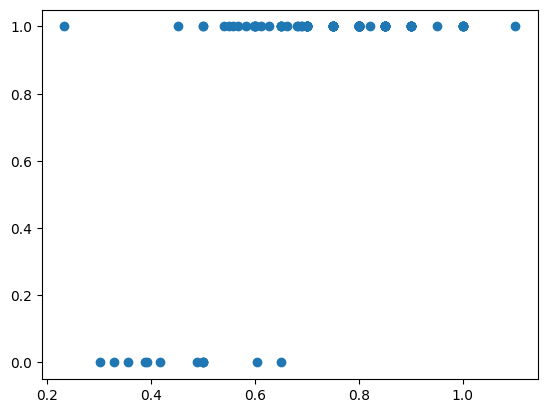

In [47]:
plt.scatter(y_test , yhat_test)

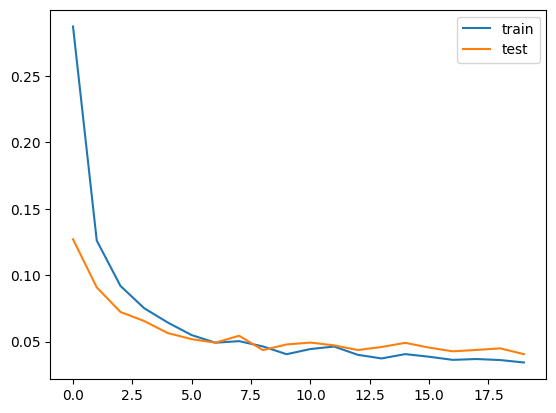

In [46]:
plt.plot(results.history["loss"] , label="train")
plt.plot(results.history["val_loss"] , label="test")
plt.legend()